In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# get data
df = pd.read_csv('./data/loan_data_hw.csv')
df

,person_age,person_gender,person_1,person_income,person_emp_exp,person_home_oqwnership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,1,3,71948,0,0,35000,4,16.02,0.49,3,561,0,1
1,21,1,0,12282,0,2,1000,1,11.14,0.08,2,504,1,0
2,25,1,0,12438,3,1,5500,3,12.87,0.44,3,635,0,1
3,23,1,2,79753,0,0,35000,3,15.23,0.44,2,675,0,1
4,24,0,3,66135,1,0,35000,3,14.27,0.53,4,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,0,1,47971,6,0,15000,3,15.66,0.31,3,645,0,1
44996,37,1,1,65800,17,0,9000,2,14.07,0.14,11,621,0,1
44997,33,0,1,56942,7,0,2771,0,10.02,0.05,10,668,0,1
44998,29,0,2,33164,4,0,12000,1,13.23,0.36,6,604,0,1


/var/folders/0d/lzd4_bln5456tqbpclpkwljc0000gn/T/ipykernel_25594/1139904092.py:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Figure size 1500x1200 with 0 Axes>

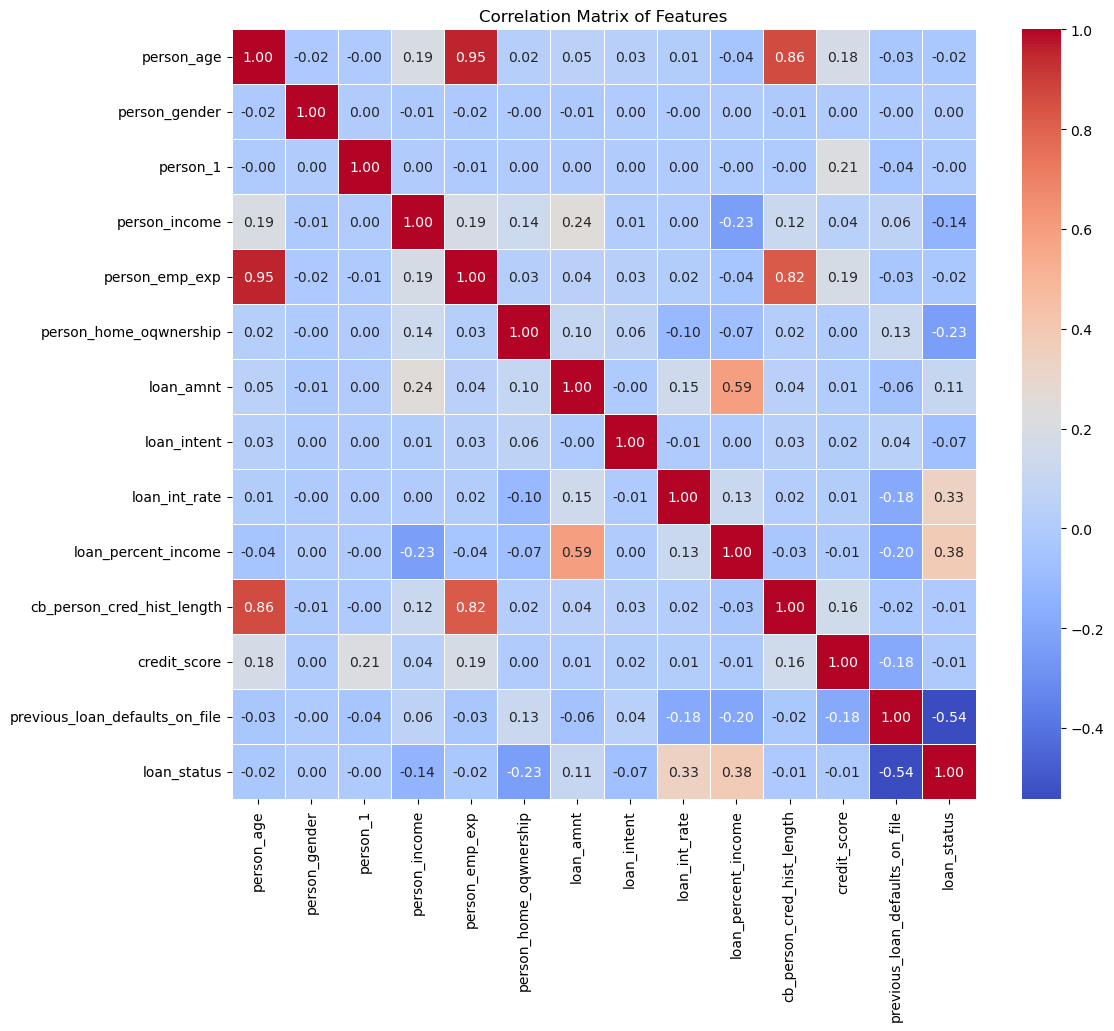

In [ ]:
# perform EDA

# Visualizations
plt.figure(figsize=(15, 12))

# Additional correlation analysis
correlation = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# we can see that the most correlated features are: the persons age and person_emp_exp. 
# another very correlated feature is the persons age and the length of their credit history.
# some other correlated features include the loan amount and the loan percent income. as well as loan status and loan interest rate.
# there are some negatively correlated features such as loan status and previous loan defaults.
# another negative correlation is the one between persons home ownership and the loan status

k=2, Mean Accuracy: 0.8831
k=3, Mean Accuracy: 0.8834
k=4, Mean Accuracy: 0.8833
k=5, Mean Accuracy: 0.8834
k=6, Mean Accuracy: 0.8834
k=7, Mean Accuracy: 0.8836
k=8, Mean Accuracy: 0.8835
k=9, Mean Accuracy: 0.8835
k=10, Mean Accuracy: 0.8835

Best k value: 7 with mean accuracy: 0.8836

Model Coefficients:
                          Feature  Coefficient
1             loan_percent_income     0.910219
0                   loan_int_rate     0.888776
2          person_home_oqwnership    -0.578448
3  previous_loan_defaults_on_file    -4.465536


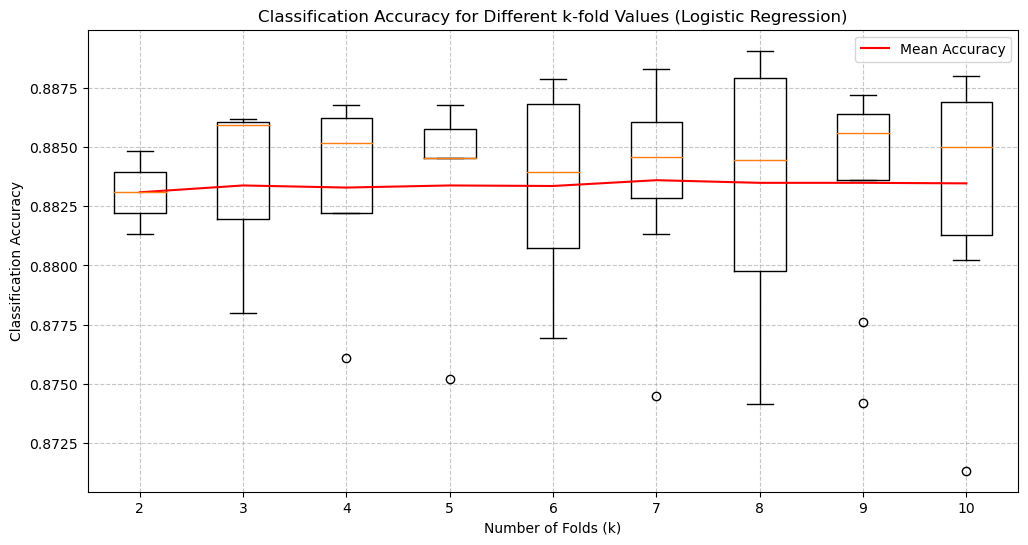

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# We'll use X (already contains the selected features) and y (loan_status) from previous cells

# Initialize lists to store results
k_values = list(range(2, 11))
cv_accuracies = []

# Perform k-fold cross validation for k in {2,3,...,10}
for k in k_values:
    # Initialize the logistic regression model
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    
    # Create k-fold cross-validation object
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(log_reg, X_scaled, y, cv=kf, scoring='accuracy')
    
    # Store results
    cv_accuracies.append(scores)

# Calculate mean accuracy for each k
mean_accuracies = [np.mean(scores) for scores in cv_accuracies]

# Create boxplot of classification rates
plt.figure(figsize=(12, 6))
plt.boxplot(cv_accuracies, labels=k_values)
plt.title('Classification Accuracy for Different k-fold Values (Logistic Regression)')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Classification Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)

# Add mean accuracy line
plt.plot(range(1, len(k_values) + 1), mean_accuracies, 'r-', label='Mean Accuracy')
plt.xticks(range(1, len(k_values) + 1), k_values)
plt.legend()

# Print the mean accuracy for each k
for i, k in enumerate(k_values):
    print(f"k={k}, Mean Accuracy: {mean_accuracies[i]:.4f}")

# Find the best k value
best_k_index = np.argmax(mean_accuracies)
best_k = k_values[best_k_index]
print(f"\nBest k value: {best_k} with mean accuracy: {mean_accuracies[best_k_index]:.4f}")

# Train the final model with the best k
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_scaled, y)

# Print model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': final_model.coef_[0]
})
print("\nModel Coefficients:")
print(coefficients.sort_values('Coefficient', ascending=False))

plt.show() 

Coefficient stability (lower std = more stable):
loan_int_rate: 0.031753
loan_percent_income: 0.054328
person_home_oqwnership: 0.042936
previous_loan_defaults_on_file: 0.009849

Features ranked by importance (absolute coefficient magnitude):
1. previous_loan_defaults_on_file: 7.5894 (-)
2. loan_percent_income: 6.7462 (+)
3. loan_int_rate: 4.2920 (+)
4. person_home_oqwnership: 3.5595 (-)


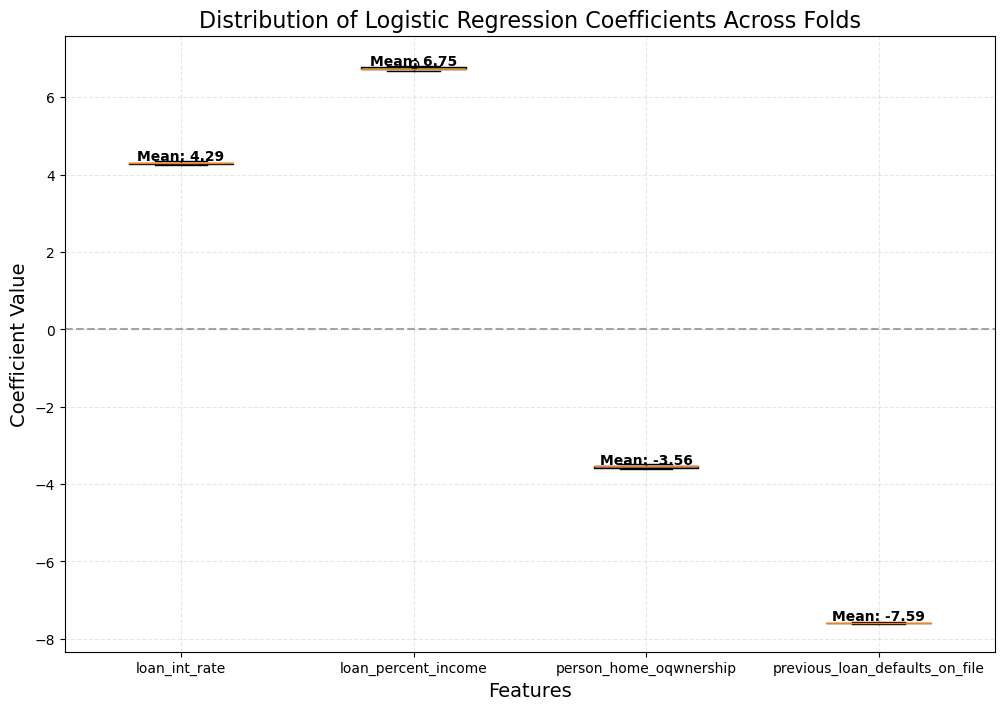

In [25]:
# Create a box plot to visualize the coefficient distributions across folds
plt.figure(figsize=(12, 8))

# Fix the typo in feature name
boxplot_data = [
    coef_df['loan_int_rate'], 
    coef_df['loan_percent_income'], 
    coef_df['person_home_oqwnership'],  # Note: this column name has a typo but using as is
    coef_df['previous_loan_defaults_on_file']
]

# Create box plot
bp = plt.boxplot(boxplot_data, patch_artist=True, labels=features)

# Customize the colors
colors = ['#FF9999', '#99FF99', '#9999FF', '#FFCC99']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add a horizontal line at y=0 to show the reference point
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)

# Add mean values as text annotations
for i, mean_val in enumerate(means):
    plt.text(i+1, mean_val, f'Mean: {mean_val:.2f}', 
             horizontalalignment='center', verticalalignment='bottom', 
             fontweight='bold')

# Add title and axis labels
plt.title('Distribution of Logistic Regression Coefficients Across Folds', fontsize=16)
plt.ylabel('Coefficient Value', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# Calculate coefficient stability (standard deviation across folds)
stability = coef_df.std()
print("Coefficient stability (lower std = more stable):")
for feature, std in zip(features, stability):
    print(f"{feature}: {std:.6f}")

# Rank features by absolute mean coefficient magnitude
abs_means = [abs(mean) for mean in means]
ranked_features = [x for _, x in sorted(zip(abs_means, features), reverse=True)]
print("\nFeatures ranked by importance (absolute coefficient magnitude):")
for i, feature in enumerate(ranked_features):
    idx = features.index(feature)
    print(f"{i+1}. {feature}: {abs(means[idx]):.4f} ({'+' if means[idx]>0 else '-'})")
